<a href="https://colab.research.google.com/github/AI-is-out-there/2025-biomed-upskill/blob/main/%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5%20%D1%83%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F%20%D0%BA%20%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B5%20%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE%20%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%BF%D1%83%D0%BD%D0%BA%D1%82%203%20CM.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Методические указания к выполнению практической работы **

---

**Тема: Машинное обучение. **  

контрольный результат confusion matrix: [XX XX XX XX] (написать в таком формате, например, [21 23 45 99])

In [1]:
#импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

# Загрузка данных

Загружаем датасет, подготовленный на предыдущих этапах обучения.

In [2]:
# providing raw url to download csv from github
csv_url = 'https://raw.githubusercontent.com/AI-is-out-there/2025-biomed-upskill/refs/heads/main/datasets/heart3.csv'

raw_table_data = pd.read_csv(csv_url, header = 0)
raw_table_data.head(3)

,Бронхиальная астма,Возраст алког,Работа,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,...,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Прекращение работы по болезни,Религия,Профессия,ССЗ,Продолжительность сна
0,0,18.0,1,0,6,0.97,0,4.0,0,0.52,...,10,0,20.0,3,25.1,0,799.035538,136.025100,0,-3
1,0,90.0,0,1,4,0.74,0,8.6,0,2.73,...,12,0,0.0,5,35.2,0,799.078379,224.056407,1,-7
2,0,17.0,0,0,7,1.57,0,5.2,0,1.02,...,11,0,0.0,5,19.0,0,799.055423,224.035858,0,-3


In [3]:
#смотрим размерность датасета
raw_table_data.shape
table_data = raw_table_data

## ML-классификация: модель GaussianNaiveBayes

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [5]:
# set the classification index of table
clf_index = 33

# classification variable
y1 = table_data.iloc[:, clf_index]
# input variable
X1 = table_data.drop(table_data.columns[[clf_index]], axis=1).iloc[:,:]

y1 = pd.Series(LabelEncoder().fit_transform(y1))
X1_train, X1_test, y1_train, y1_test = train_test_split(X1.values,
                                                        y1.values,
                                                        test_size=0.2,
                                                        random_state=37,
                                                        stratify=y1.values)

In [6]:
sk_nb_clf = GaussianNB(var_smoothing=1e-02)
sk_nb_clf.fit(X1_train, y1_train)
sk_nb_clf_pred_res = sk_nb_clf.predict(X1_test)
sk_nb_clf_accuracy = accuracy_score(y1_test, sk_nb_clf_pred_res)
y_pred=sk_nb_clf.predict(X1_test)


              precision    recall  f1-score   support

        True       0.72      0.56      0.63        86
       False       0.69      0.82      0.75       104

    accuracy                           0.70       190
   macro avg       0.70      0.69      0.69       190
weighted avg       0.70      0.70      0.69       190



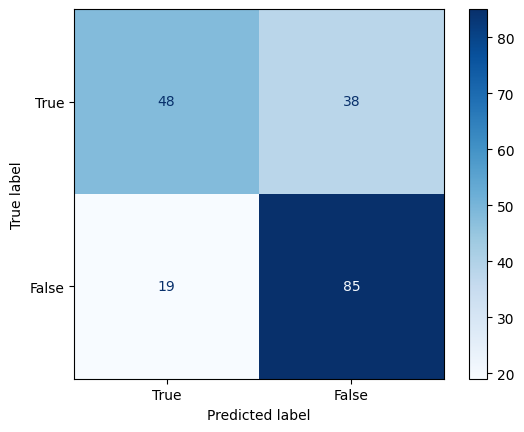

In [7]:
target_names = ['True', 'False']
labels_names = [0,1]
print(classification_report(y1_test, y_pred,labels=labels_names, target_names=target_names))
cm = confusion_matrix(y1_test, y_pred,labels=labels_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

In [8]:
cm

array([[48, 38],
       [19, 85]])